## Prim's Algorithm

In [3]:
import graphviz as gv
import numpy as np

def adjmShow(M, labels=None, directed=False, weighted=False, layout="neato"):
  g = gv.Digraph("G") if directed else gv.Graph("G")
  g.graph_attr["layout"] = layout
  g.node_attr["style"] = "filled"
  g.node_attr["color"] = "orange"
  n = len(M)
  for u in range(n):
    g.node(str(u), labels[u] if labels else str(u))
  for u in range(n):
    for v in range(0 if directed else u, n):
      if weighted:
        if not np.isnan(M[u, v]):
          g.edge(str(u), str(v), f"{M[u, v]:.0f}")
      else:
        if M[u, v] == 1:
          g.edge(str(u), str(v))
  return g
def adjlShow(L, labels=None, directed=False, weighted=False, layout="neato"):
  g = gv.Digraph("G") if directed else gv.Graph("G")
  g.graph_attr["layout"] = layout
  g.node_attr["style"] = "filled"
  g.node_attr["color"] = "orange"
  n = len(L)
  for u in range(n):
    g.node(str(u), labels[u] if labels else str(u))
  added = set()
  if weighted:
    for u in range(n):
      for v, w in L[u]:
        if not directed and not f"{u},{v}" in added:
          added.add(f"{u},{v}")
          added.add(f"{v},{u}")
          g.edge(str(u), str(v), str(w))
        elif directed:
          g.edge(str(u), str(v), str(w))
  else:
    for u in range(n):
      for v in L[u]:
        if not directed and not f"{u},{v}" in added:
          added.add(f"{u},{v}")
          added.add(f"{v},{u}")
          g.edge(str(u), str(v))
        elif directed:
          g.edge(str(u), str(v))
  return g
def readAdjl(fn, haslabels=False, weighted=False, sep="|"):
  with open(fn) as f:
    labels = None
    if haslabels:
      labels = f.readline().strip().split()
    L = []
    for line in f:
      if weighted:
        L.append([tuple(map(int, p.split(sep))) for p in line.strip().split()])
        # line => "1|3 2|5 4|4" ==> [(1, 3), (2, 5), (4, 4)]
      else: 
        L.append(list(map(int, line.strip().split()))) # "1 3 5" => [1, 3, 5]
        # L.append([int(x) for x in line.strip().split()])
  return L, labels

In [2]:
%%file prim.txt
1|7 2|9 4|1
0|7 2|4 5|2
0|9 1|4 4|6 5|5 6|9
5|2
0|1 2|6 6|2 7|6
1|2 2|5 3|2 7|3
2|9 4|2 7|3
4|6 5|3 6|3

Overwriting prim.txt


[(0, 4), (4, 6), (6, 7), (7, 5), (5, 1), (5, 3), (1, 2)]


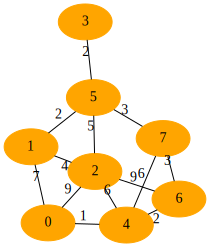

In [10]:
import Heap as hp

def prim(graph):
    n = len(graph)
    visited = [False]*n
    path = [None]*n
    cost = [float("inf")]*n
    pq = hp.Heap(lambda a,b: a[0] < b[0])
    pq.push((0,0))
    cost[0] = 0
    result = []
    while pq.Size() > 0:
        _ , v = pq.pop()
        if not visited[v]:
            visited[v] = True
            if path[v] != None:
                result.append((path[v],v))
            for u, w in graph[v]:
                if not visited[u] and w < cost[u]:
                    cost[u] = w
                    path[u] = v
                    pq.push((w,u))
    return result

graph, _ = readAdjl("prim.txt",weighted=True)
print(prim(graph))
adjlShow(graph,weighted=True)
    

### MST Online Judge Exercise - Highways

In [15]:
%%file mstEj.txt
1
9
1 5
0 0
3 2
4 5
5 1
0 4
5 2
1 2
5 3
3
1 3
9 7
1 2

Overwriting mstEj.txt


In [1]:
import DisjointSet as djs
import Heap as hp

def ModedKruskal(graph,ds):
    n = len(graph)
    pq = hp.Heap(lambda a, b: a[0] < b[0])
    result = []
    for v in range(n):
        for u, w in graph[v]:
            pq.push((w,v,u))
    while pq.Size() > 0 and n > 1:
        w, v, u = pq.pop()
        if not ds.isSameSet(v,u):
            ds.union(v,u)
            result.append((v+1,u+1))
            n -= 1
    return result

def main():
    with open("mstEj.txt",mode="r") as file:
        testCases = int(file.readline().strip())
        for _ in range(testCases):
            n = int(file.readline().strip())
            towns = [None]*n
            graph = [[] for _ in range(n)]
            for i in range(n):
                x, y = map(int,file.readline().strip().split())
                towns[i] = (x,y)
            for v in range(n):
                for u in range(n):
                    if v == u:
                        continue
                    x1, y1 = towns[v]
                    x2, y2 = towns[u]
                    dist = ((x2 - x1)**2 + (y2 - y1)**2)**(1/2)
                    graph[v].append((u,dist))
            e = int(file.readline().strip())
            ds = djs.DisjointSet(n)
            for _ in range(e):
                v, u = map(int,file.readline().strip().split())
                v -= 1
                u -= 1
                if not ds.isSameSet(v,u):
                    ds.union(v,u)
            print(ModedKruskal(graph,ds))
if __name__ == "__main__":
    main()


[(5, 7), (6, 1), (8, 3), (7, 3), (4, 9)]
